# Difference Between map() vs applymap() vs apply() methods
The main advantage of pandas is to manipulate data (transformations) and apply analytics on the data, all these map(), applymap() and apply() methods are used to modify the data however there are differences between these and their usage are slightly different.



# Map(),applymap(),apply()

 In Pandas, map, applymap, and apply are three important methods used for applying functions to DataFrame or Series objects. Although they may seem similar, they serve different purposes and have different use cases.

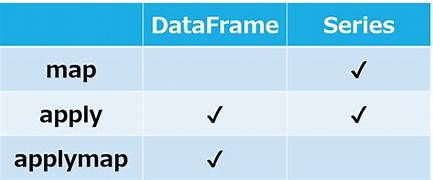

# Flowchart of how and when to use the apply,applymap,map functions

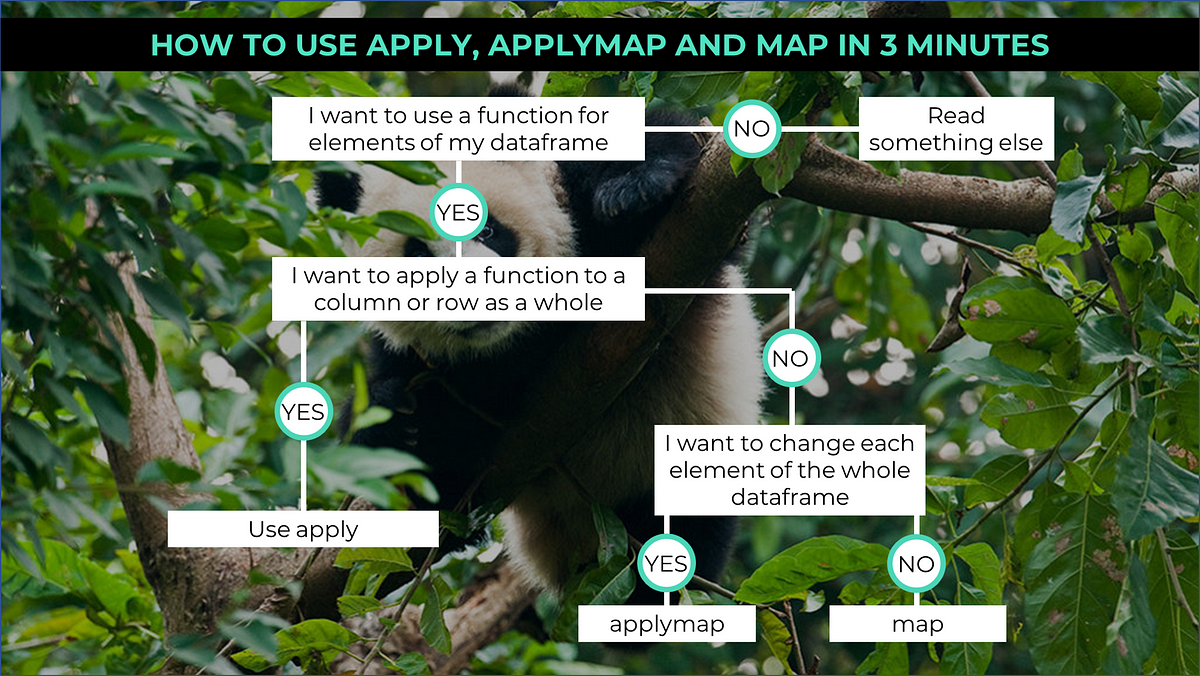

## Pandas.Series.map():
This method defined only in Series and not present in DataFrame.
- map() accepts dicts, Series, or callable
- You can use this to perform operations on a specific column of a DataFrame as each column in a DataFrame is Series.
- map() when passed a dictionary/Series will map elements based on the keys in that dictionary/Series. Missing values will be     recorded as NaN in the output.
- Series.map() operate on one element at time

## Pandas.DataFrame.applymap():
Pandas DataFrame.applymap() method is defined only in DataFrame.
- Accept callables only.
- applymap() is elementwise for DataFrames.
- applymap() performs better than apply().
- applymap() operates on one element at time.


## Pandas.Series.apply() & Pandas.DataFrame.apply():
This method defined in both Series and DataFrame
- Accept callables only
- apply() also works elementwise but is suited to more complex operations and aggregation.
- DataFrame.apply() operates on entire rows or columns at a time.
- Series.apply() operate on one element at time


# map():

## Syntax:
Series.map(arg, na_action=None)

In [1]:
# importing required libraries
import pandas as pd

In [31]:
S=pd.Series([1,2,3,4,5])
print(S)
S.map()

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [35]:
S.map(lambda x:x**2)

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [4]:
#let us create a DataFrame to konw the usecases and difference functionalities between them.
df=pd.DataFrame({"Name":["A","B","C","D","E"],"Gender":["M","F","M","F","M"],"Age":[25,37,69,59,18],"Salary":[15000,20000,50000,100000,35000]})

In [5]:
df

,Name,Gender,Age,Salary
0,A,M,25,15000
1,B,F,37,20000
2,C,M,69,50000
3,D,F,59,100000
4,E,M,18,35000


In [14]:
df["Gender"].map({"M":"Male","F":"Female"})

0      Male
1    Female
2      Male
3    Female
4      Male
Name: Gender, dtype: object

In [114]:
# Sample Series with grades
grades = pd.Series(['A', 'B', 'C', 'D', 'A', 'B'])

# Define a dictionary mapping grades to grade points
grade_points = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

# Map grades to grade points
grade_points_series = grades.map(grade_points)

print(grade_points_series)

0    4
1    3
2    2
3    1
4    4
5    3
dtype: int64


## Summary:
- map is a Series method in Pandas that is used to substitute each value in a Series with another value.
- It takes a function or a dictionary-like object as an argument. If it's a function, it applies the function element-wise to each element of the Series. If it's a dictionary-like object, it replaces the values in the Series with the corresponding values from the dictionary.
- map is primarily used for transforming values in a Series.
- It doesn't work on DataFrames.

# applymap():

## Syntax:
```DataFrame.applymap(
    func: 'PythonFuncType',
    na_action: 'str | None' = None,
    **kwargs,
)```

In [36]:
df1=pd.DataFrame({"A":[1,2,3],"B":[4,5,6],"C":[7,8,9]})
df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [49]:
df1.applymap(lambda x:x**2)

,A,B,C
0,1,16,49
1,4,25,64
2,9,36,81


In [51]:
df1.applymap(lambda x:x<<2)

,A,B,C
0,4,16,28
1,8,20,32
2,12,24,36


In [52]:
df1.applymap(lambda x:x>>2)

,A,B,C
0,0,1,1
1,0,1,2
2,0,1,2


In [112]:
# Sample DataFrame with numerical data
data = {
    'A': [10, 20, 30],
    'B': [5, 15, 25],
    'C': [8, 18, 28]
}

df = pd.DataFrame(data)

# Define a function to normalize data
def normalize(value):
    mean = df.mean().mean()
    std = df.std().mean()
    return (value - mean) / std

# Apply the function to every element of the DataFrame
normalized_df = df.applymap(normalize)

print(normalized_df)


          A         B         C
0 -0.766667 -1.266667 -0.966667
1  0.233333 -0.266667  0.033333
2  1.233333  0.733333  1.033333


## Summary:
- applymap is a DataFrame method in Pandas that is used to apply a function to each element of the DataFrame.
- It applies a function to every element of the DataFrame independently.
- applymap is used when you want to apply a function to every element of a DataFrame

# apply():

## Syntax:

```
DataFrame/Series.apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type=None,
    args=(),
    **kwargs,
)
```

In [53]:
df2=pd.DataFrame({"Name":["A","B","C","D","E","F"],"Gender":["M","F","M","F","M","M"],"Age":[25,67,35,28,85,45],"Salary":[25000,65000,75000,50000,100000,30000]})

In [58]:
df2["Bonus"]=df2.apply(lambda x:(x["Salary"]*15)/100,axis=1)
df2

,Name,Gender,Age,Salary,Bonus
0,A,M,25,25000,3750.0
1,B,F,67,65000,9750.0
2,C,M,35,75000,11250.0
3,D,F,28,50000,7500.0
4,E,M,85,100000,15000.0
5,F,M,45,30000,4500.0


In [76]:
df2["Salary"].apply(lambda x:x//2)

0    12500
1    32500
2    37500
3    25000
4    50000
5    15000
Name: Salary, dtype: int64

In [77]:
# The sum of salaries and Bonus along axis=0
df2[["Salary","Bonus"]].apply(lambda x:x.sum())

Salary    345000.0
Bonus      51750.0
dtype: float64

In [78]:
# The sum of salaries and Bonus along axis=1
df2[["Salary","Bonus"]].apply(lambda x:x.sum(),axis=1)

0     28750.0
1     74750.0
2     86250.0
3     57500.0
4    115000.0
5     34500.0
dtype: float64

In [82]:
# The average salary and bonus of persons along axis=0
df2[["Salary","Bonus"]].apply(lambda x:x.mean(),axis=0)

Salary    57500.0
Bonus      8625.0
dtype: float64

In [81]:
# The average salary and bonus of persons along axis=1
df2[["Salary","Bonus"]].apply(lambda x:x.mean(),axis=1)

0    14375.0
1    37375.0
2    43125.0
3    28750.0
4    57500.0
5    17250.0
dtype: float64

In [113]:
# Sample sales data
data = {
    'Product': ['A', 'B', 'C'],
    'UnitPrice': [10, 20, 15],
    'QuantitySold': [100, 150, 120]
}
df = pd.DataFrame(data)


# Define a function to calculate total revenue
def calculate_revenue(row):
    return row['UnitPrice'] * row['QuantitySold']


# Apply the function along rows to calculate total revenue
df['TotalRevenue'] = df.apply(calculate_revenue, axis=1)
print(df)


  Product  UnitPrice  QuantitySold  TotalRevenue
0       A         10           100          1000
1       B         20           150          3000
2       C         15           120          1800


## Summary:
- apply is both a Series and DataFrame method in Pandas.
- When applied to a Series, it applies a function along the axis of the Series.
- When applied to a DataFrame, it applies a function along the rows or columns of the DataFrame.
- It is used when you need more flexibility in how the function is applied, such as applying it row-wise or column-wise.



In [83]:
data = [(3,5,7), (2,4,6),(5,8,9)]
d1 = pd.DataFrame(data, columns = ['A','B','C'])
d1

,A,B,C
0,3,5,7
1,2,4,6
2,5,8,9


In [98]:
# Using apply() on single column
d1["A"]=d1["A"].apply(lambda x:x/100)
print("apply() on A column:")
print(d1)
print("*"*50)


# Using apply() on DataFrame
d2=d1.apply(lambda x:x.median())
print("apply() on dataframe d1:" )
print(d2)
print("*"*50)

# Using applymap() on DataFrame
d3=d1.applymap(lambda x:x**3)
print("applymap() on dataframe d1:")
print(d3)
print("*"*50)

# Using Applymap()
d4=d1.applymap(lambda x:str(x)+".00")
print("applymap() on dataframe d1:")
print(d4)
print("*"*50)

# USsing map() on single column
print("map() on B column:")
d6=d1["B"].map(lambda x:x+x)
print(d6)

apply() on A column:
              A  B  C
0  3.000000e-22  5  7
1  2.000000e-22  4  6
2  5.000000e-22  8  9
**************************************************
apply() on dataframe d1:
A    3.000000e-22
B    5.000000e+00
C    7.000000e+00
dtype: float64
**************************************************
applymap() on dataframe d1:
              A    B    C
0  2.700000e-65  125  343
1  8.000000e-66   64  216
2  1.250000e-64  512  729
**************************************************
applymap() on dataframe d1:
                           A     B     C
0                   3e-22.00  5.00  7.00
1                   2e-22.00  4.00  6.00
2  5.0000000000000005e-22.00  8.00  9.00
**************************************************
map() on B column:
0    10
1     8
2    16
Name: B, dtype: int64


# Note:
The main difference lies in their application scope. map is used for element-wise operations on Series objects, applying a function to each element independently. On the other hand, applymap is used for element-wise operations on DataFrame objects, applying a function to each element independently. While both methods operate element-wise, they are applied on different data structures.






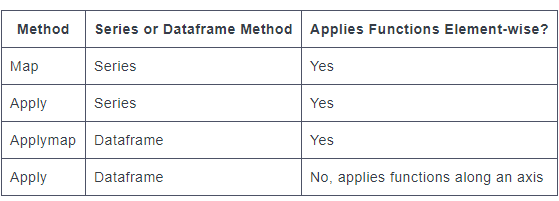

## Conclusion:
These examples demonstrate how apply, applymap, and map can be used effectively on different datasets in Pandas to perform various operations. These methods provide flexibility and efficiency when working with DataFrames and Series, enabling complex data manipulations and transformations.